In [2]:
import numpy as np # linear algebra
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv("C:\\dataset.csv")

In [4]:
df.head()


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-16131500152,12-06-2018,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,Ahmedabad,50613,POINT (-92.429331 42.512766),7,Ahmedabad,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19
1,INV-16062000032,12-04-2018,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,Bangalore,52240,POINT (-91.518868 41.676095),52,Bangalore,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,3,81.0,2.25,0.59
2,INV-15962400282,11/29/2018,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,Mumbai,50613,POINT (-92.429331 42.512766),7,Mumbai,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19
3,INV-16226300035,12-11-2018,2545,HY-VEE / IOWA CITY,310 N 1ST ST,Chennai,52245,POINT (-91.528105 42.207428),52,Chennai,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,2,54.0,1.50,0.39
4,INV-16296600079,12/13/2018,2582,HY-VEE #2 FOOD STORE / MASON CITY,551 S ILLINOIS AVE,Kolkata,50401,POINT (-93.17114 43.14623),17,Delhi,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Invoice/Item Number    1048575 non-null  object 
 1   Date                   1048575 non-null  object 
 2   Store Number           1048575 non-null  int64  
 3   Store Name             1048575 non-null  object 
 4   Address                1043329 non-null  object 
 5   City                   1048575 non-null  object 
 6   Zip Code               1048575 non-null  int64  
 7   Store Location         951303 non-null   object 
 8   County Number          1048575 non-null  int64  
 9   County                 1048575 non-null  object 
 10  Category               1044865 non-null  float64
 11  Category Name          1044865 non-null  object 
 12  Vendor Number          1048572 non-null  float64
 13  Vendor Name            1048574 non-null  object 
 14  Item Number       

In [6]:
df.isnull()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:

df.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   5246
City                         0
Zip Code                     0
Store Location           97272
County Number                0
County                       0
Category                  3710
Category Name             3710
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description            21
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [8]:
df['Store Location'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570     True
1048571    False
1048572    False
1048573    False
1048574    False
Name: Store Location, Length: 1048575, dtype: bool

In [9]:


df['Address'] = df.groupby('Store Number')['Address'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else '')
)


In [36]:
df.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                      0
City                         0
Zip Code                     0
Store Location           97272
County Number                0
County                       0
Category                  3710
Category Name             3710
Vendor Number                0
Vendor Name                  0
Item Number                  0
Item Description             6
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [37]:
df['Vendor Number'] = df['Vendor Number'].fillna(method='ffill')

C:\Users\Sumit\AppData\Local\Temp\ipykernel_30108\843810957.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Vendor Number'] = df['Vendor Number'].fillna(method='ffill')


In [38]:

df['Vendor Number'].isnull().sum()

np.int64(0)

In [39]:
df['Address'] = df['Address'].fillna("Unknown")


In [40]:
df['Address'].isnull().sum()

np.int64(0)

In [41]:
df['Vendor Name'] = df['Vendor Name'].fillna("Unknown")

In [42]:
df['Vendor Name'].isnull().sum()

np.int64(0)

In [43]:



df['Item Description'] = df.groupby('Item Number')['Item Description'].transform(lambda x: x.ffill().bfill())

C:\Users\Sumit\AppData\Local\Temp\ipykernel_30108\1083055853.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Item Description'] = df.groupby('Item Number')['Item Description'].transform(lambda x: x.ffill().bfill())


In [44]:
df['Item Description'].isnull().sum()

np.int64(6)

In [45]:
df = df.dropna(subset=['Category', 'Category Name'])

In [46]:
df['Category'].isnull().sum()

np.int64(0)

In [47]:
df['Category Name'].isnull().sum()

np.int64(0)

In [48]:
df['Store Location'] = df['Store Location'].fillna("Unknown")

C:\Users\Sumit\AppData\Local\Temp\ipykernel_30108\1005555393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Store Location'] = df['Store Location'].fillna("Unknown")


In [49]:
df['Store Location'].isnull().sum()

np.int64(0)

In [50]:
df["Date"] = pd.to_datetime(df["Date"], format='mixed', dayfirst=True, errors='coerce')

C:\Users\Sumit\AppData\Local\Temp\ipykernel_30108\3116977760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"], format='mixed', dayfirst=True, errors='coerce')


In [51]:
store_sales = df.groupby('Store Name')['Bottles Sold'].sum().reset_index()
category_sales = df.groupby('Category Name')['Bottles Sold'].sum().reset_index()


In [52]:
df.isnull().sum()

Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

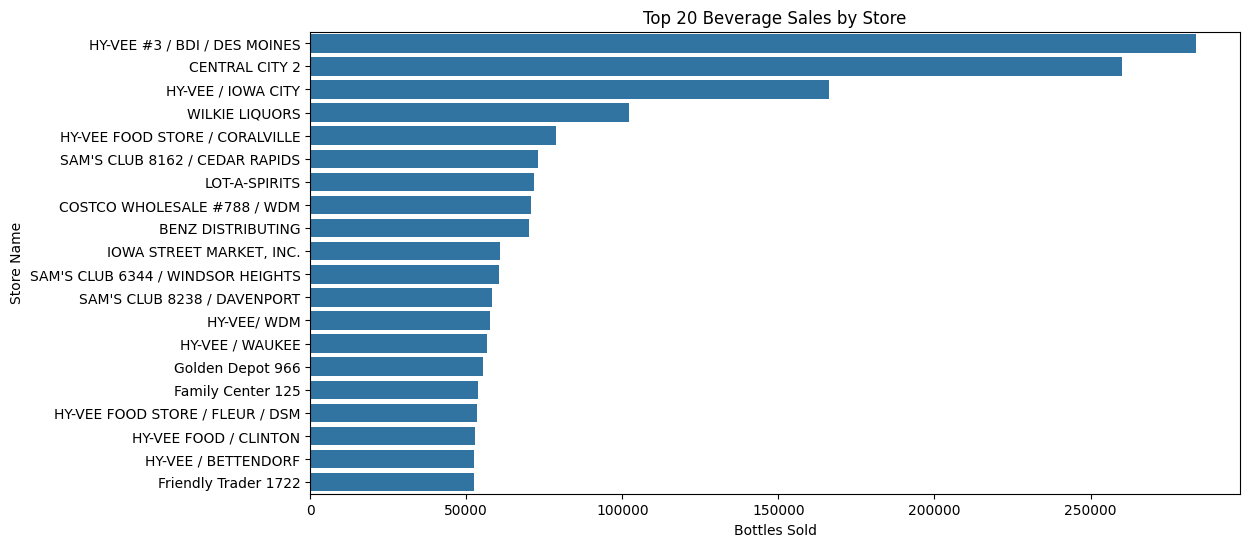

In [ ]:
top_stores = store_sales.sort_values(by='Bottles Sold', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_stores, x='Bottles Sold', y='Store Name')
plt.title('Top 20 Beverage Sales by Store')
plt.show()


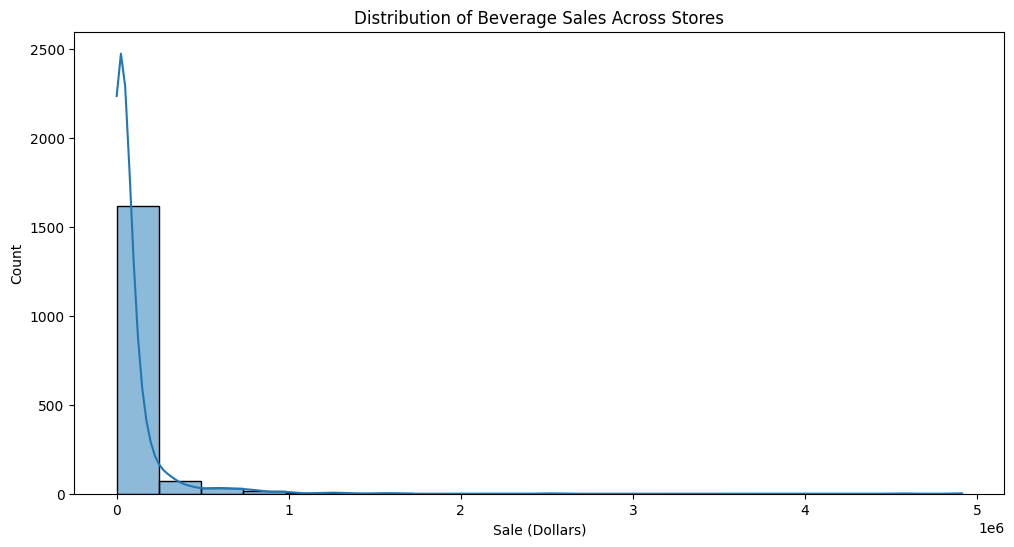

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(store_sales['Sale (Dollars)'], bins=20, kde=True)
plt.title('Distribution of Beverage Sales Across Stores')
plt.show()



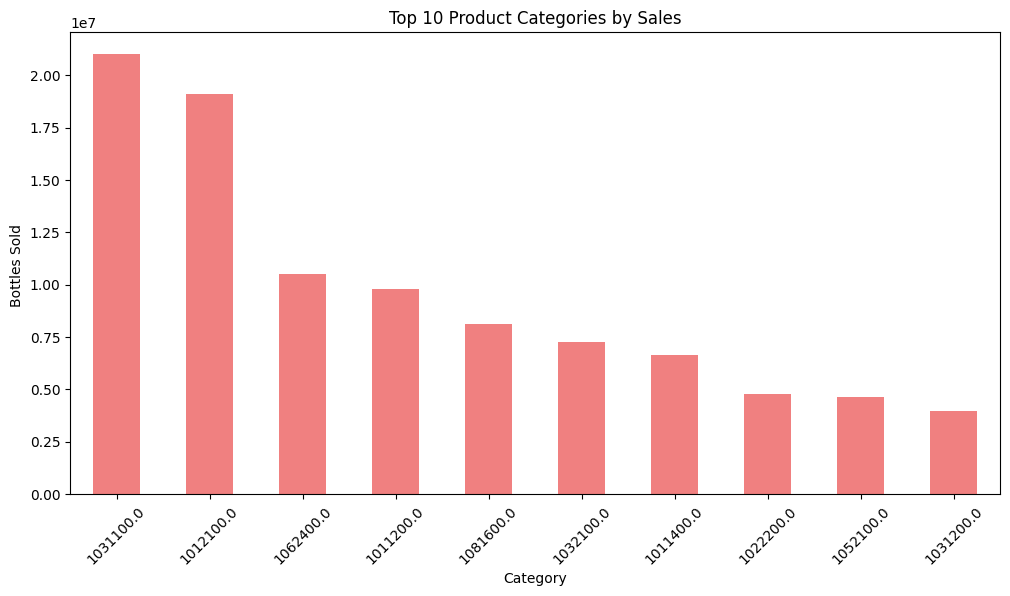

In [ ]:
top_categories = df.groupby("Category")["Sale (Dollars)"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Product Categories by Sales")
plt.xlabel("Category")
plt.ylabel("Bottles Sold ")
plt.xticks(rotation=45)
plt.show()


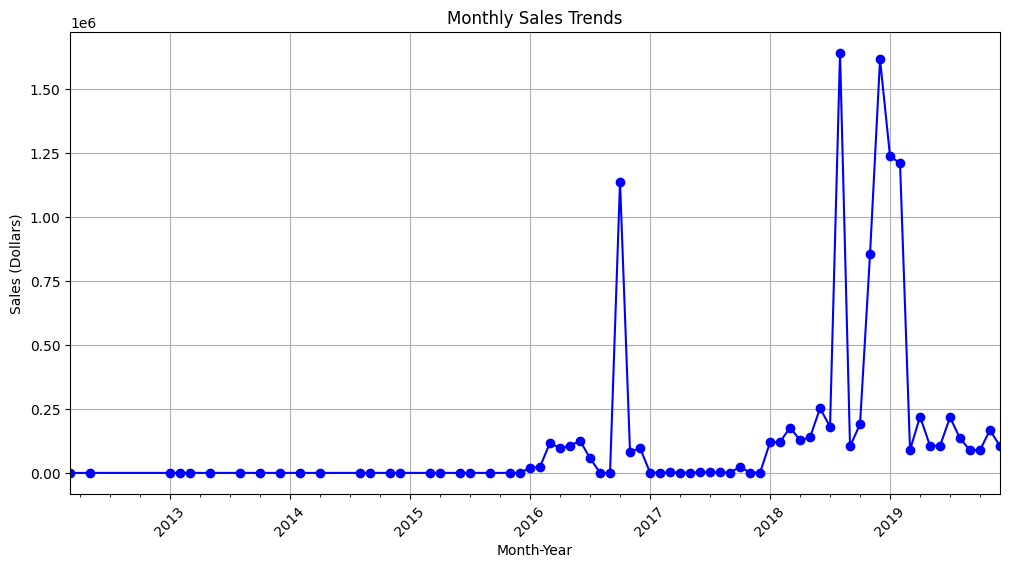

In [ ]:
df["Month-Year"] = df["Date"].dt.to_period("M")  
monthly_sales = df.groupby("Month-Year")["Bottles Sold"].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="blue", linestyle="-")
plt.title("Monthly Sales Trends")
plt.xlabel("Month-Year")
plt.ylabel("Sales (Dollars)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [32]:

average_sales = df["Sale (Dollars)"].mean()
print(f"Average Sales Per Transaction: ${average_sales:.2f}")

Average Sales Per Transaction: $142.36


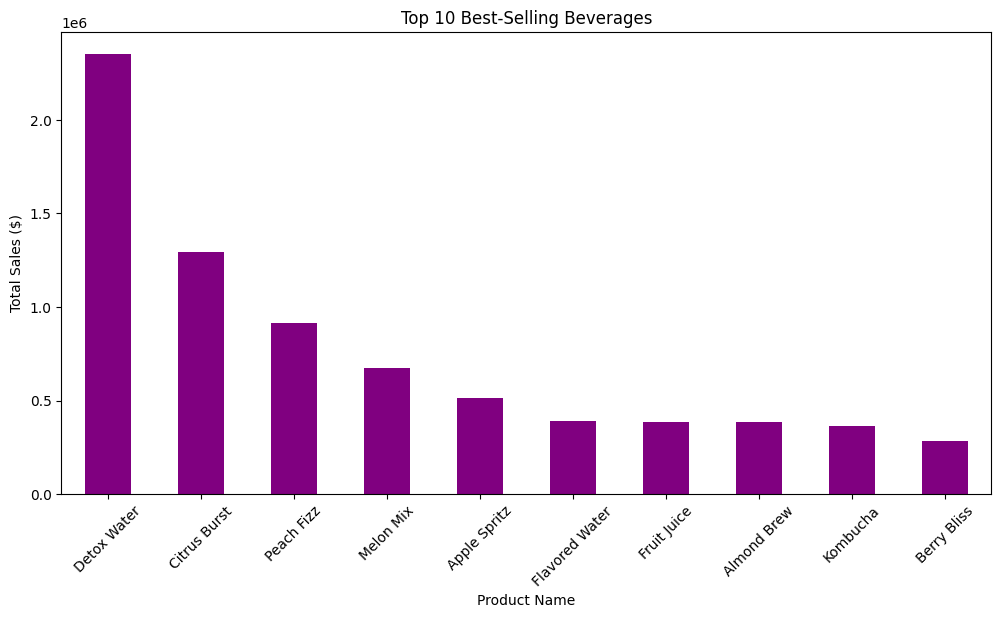

In [ ]:
top_products = df.groupby("Category Name")["Bottles Sold"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="purple")
plt.title("Top 10 Best-Selling Beverages")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

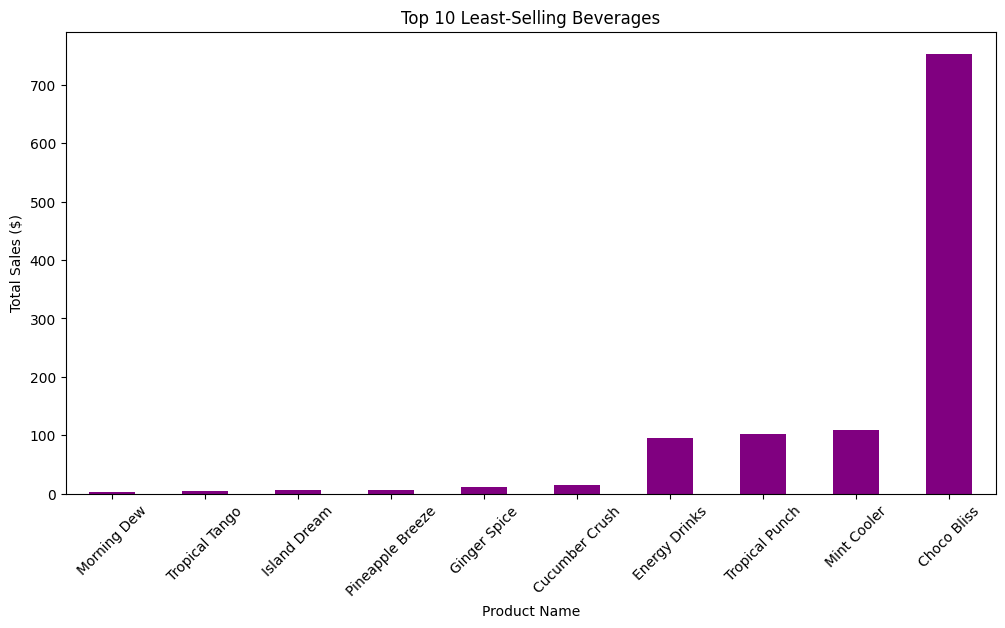

In [ ]:
top_products = df.groupby("Category Name")["Bottles Sold"].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="purple")
plt.title("Top 10 Least-Selling Beverages")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_14072\3775654940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Sale (Dollars)", data=sales_by_country, palette="coolwarm")


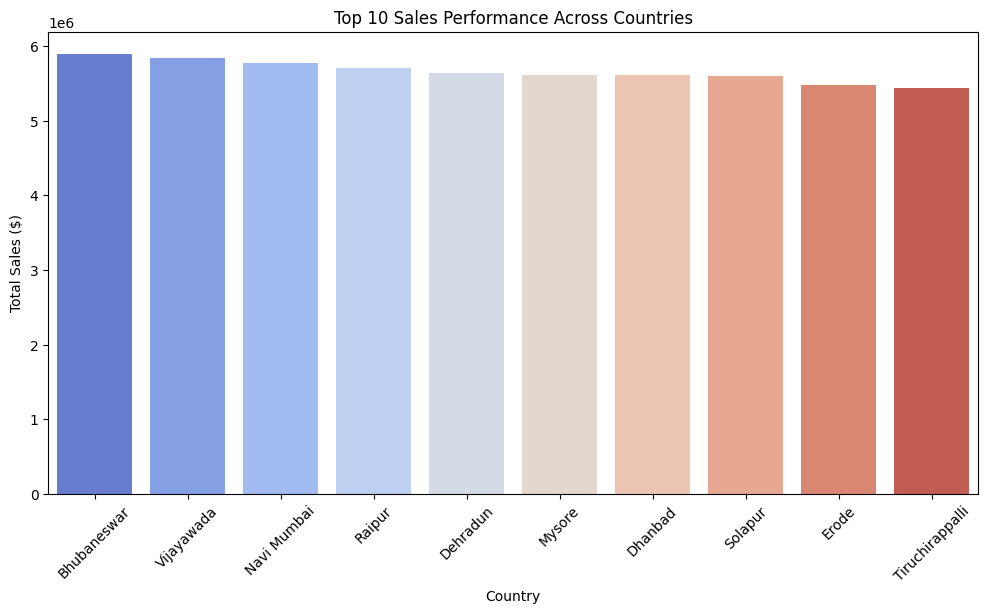

In [ ]:
sales_by_country = df.groupby("City")["Sale (Dollars)"].sum().reset_index().nlargest(10, "Sale (Dollars)")
plt.figure(figsize=(12, 6))
sns.barplot(x="City", y="Sale (Dollars)", data=sales_by_country, palette="coolwarm")
plt.title("Top 10 Sales Performance Across Countries")
plt.xlabel("Country")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_14072\640107639.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Sale (Dollars)", data=sales_by_country, palette="coolwarm")


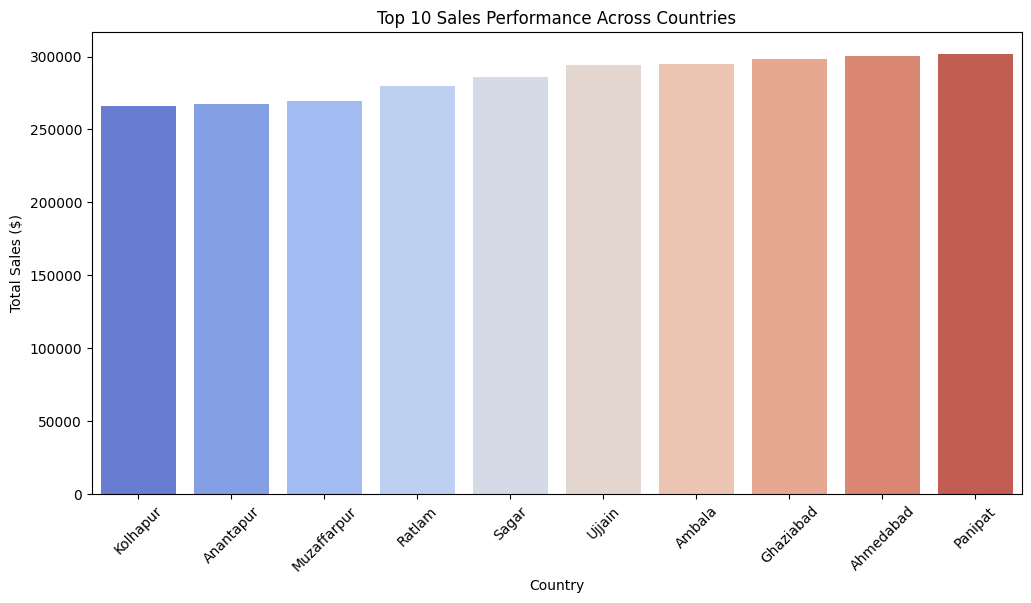

In [ ]:
sales_by_country = df.groupby("City")["Sale (Dollars)"].sum().reset_index().nsmallest(10, "Sale (Dollars)")
plt.figure(figsize=(12, 6))
sns.barplot(x="City", y="Sale (Dollars)", data=sales_by_country, palette="coolwarm")
plt.title("Top 10 Sales Performance Across Countries")
plt.xlabel("Country")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["Inventory Turnover"] = df["Sale (Dollars)"] / df["Pack"]
inventory_turnover = df.groupby("Category Name")["Inventory Turnover"].mean().sort_values(ascending=False)
print(inventory_turnover)

Category Name
Choco Bliss                589.595000
Vanilla Shake               42.528615
Sports Drinks               39.815196
Sparkling Water             36.735631
Peach Fizz                  35.620271
Sunset Sangria              30.627147
Caramel Latte               28.346448
Berry Blend                 26.009830
Cold Brew Coffee            25.479988
Fruit Juice                 24.804874
Cucumber Crush              24.606667
Melon Mix                   22.981171
Berry Bliss                 22.335408
Coconut Water               21.130145
Iced Tea                    21.022045
Citrus Burst                20.844359
Custom Drink 55             20.547791
Tropical Punch              17.856222
Lavender Lemonade           17.557755
Citrus Cooler               17.266751
Apple Spritz                17.160985
Nutty Delight               16.845274
Custom Drink 56             16.452174
Chai Latte                  16.405896
Detox Water                 16.077229
Pineapple Breeze            15.00000

📉 Understocked Products
📦 Overstocked Products


C:\Users\Sumit\AppData\Local\Temp\ipykernel_14072\1835791099.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Category Name", y="Pack", palette="coolwarm")


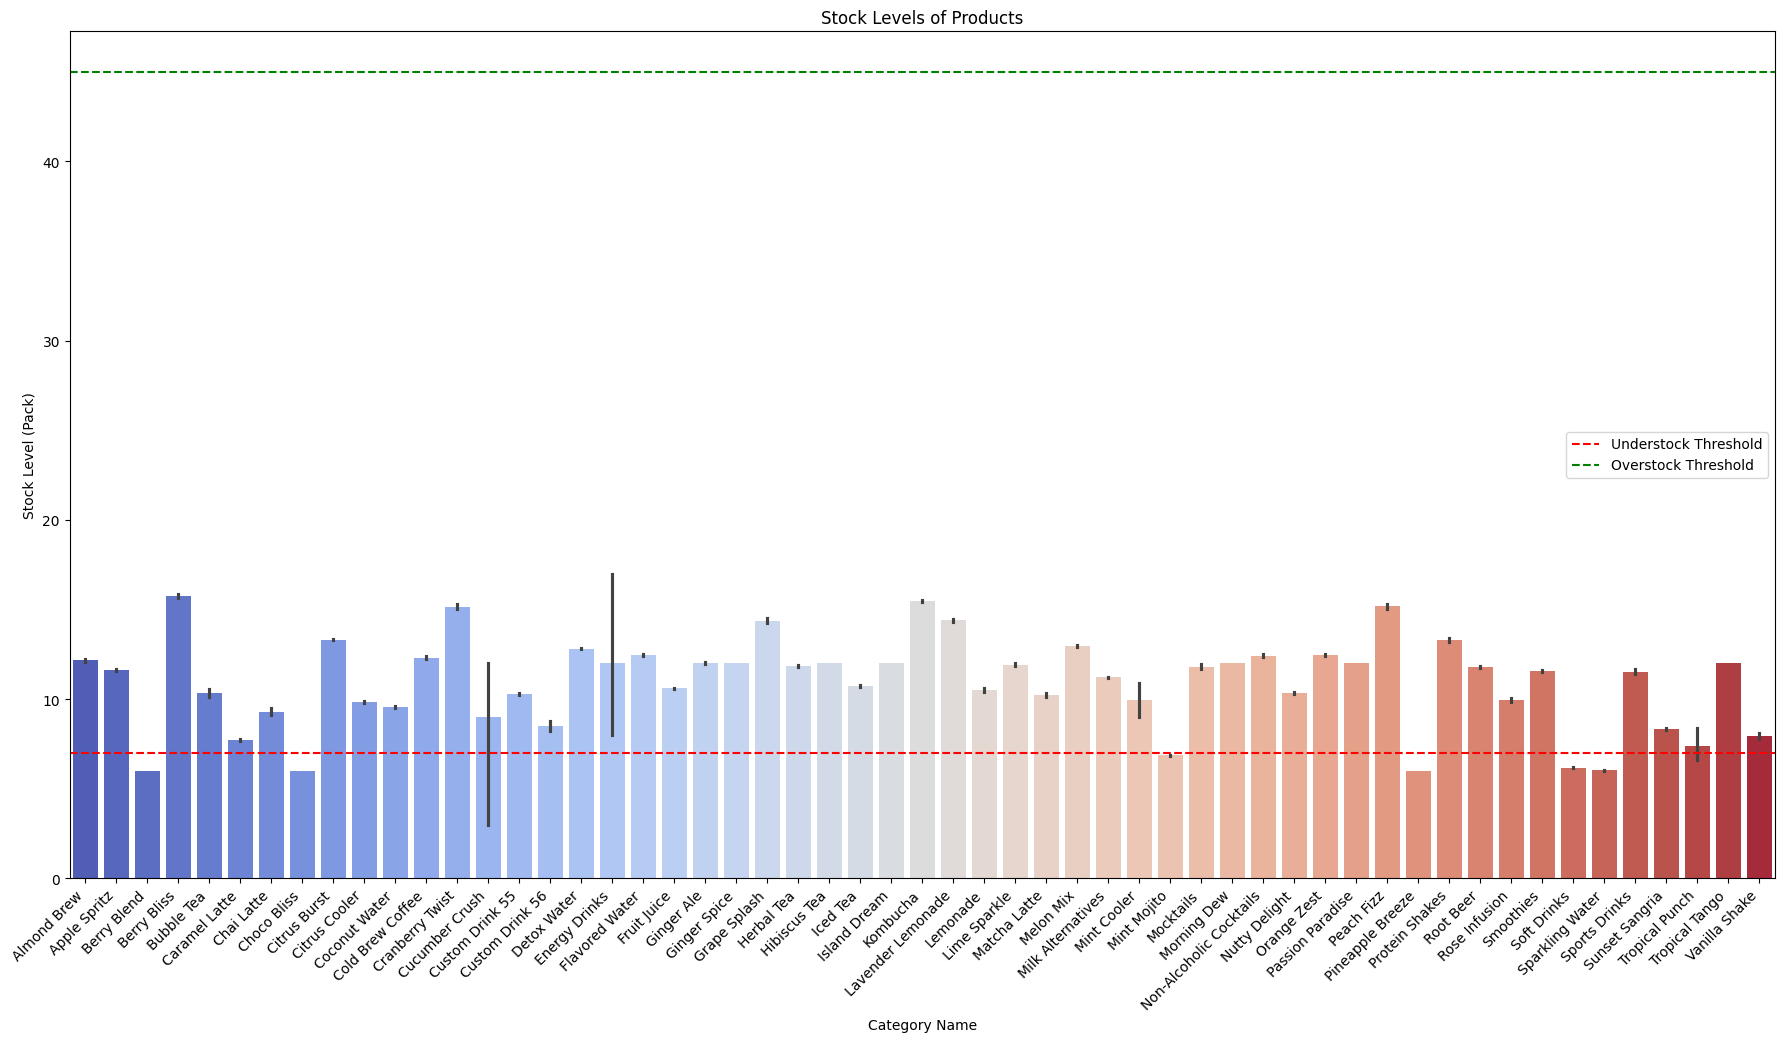

In [ ]:
low_stock_threshold = 7  
high_stock_threshold = 45

understocked = df[df["Pack"] < low_stock_threshold]
overstocked = df[df["Pack"] > high_stock_threshold]
plt.figure(figsize=(22, 11))

sns.barplot(data=df, x="Category Name", y="Pack", palette="coolwarm")
plt.axhline(y=low_stock_threshold, color="red", linestyle="dashed", label="Understock Threshold")
plt.axhline(y=high_stock_threshold, color="green", linestyle="dashed", label="Overstock Threshold")

plt.title("Stock Levels of Products")
plt.xlabel("Category Name")
plt.ylabel("Stock Level (Pack)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

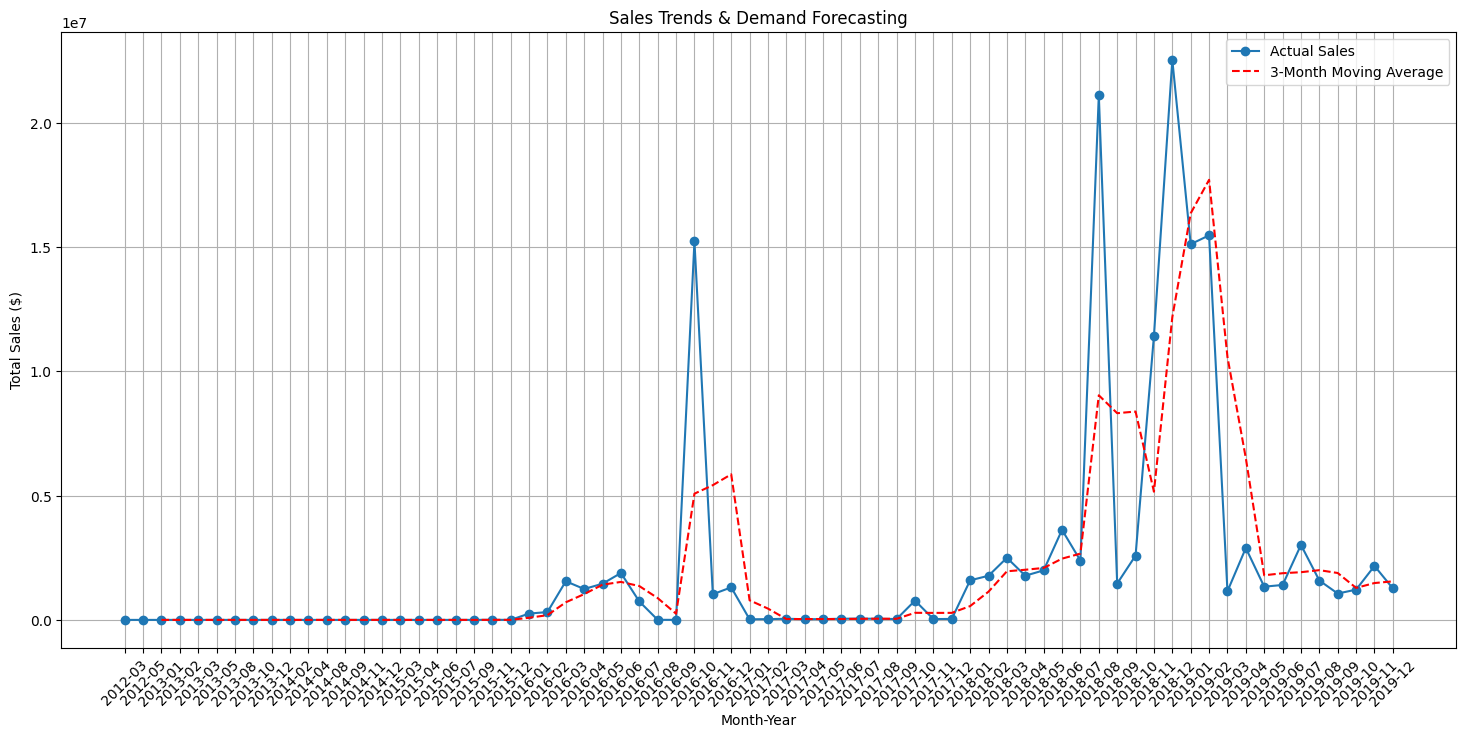

In [ ]:



df["Month-Year"] = df["Date"].dt.to_period("M")
df["Month-Year"] = df["Month-Year"].astype(str)
monthly_sales = df.groupby("Month-Year")["Sale (Dollars)"].sum().head(90)
monthly_sales_ma = monthly_sales.rolling(window=3).mean()
plt.figure(figsize=(18, 8))
plt.plot(monthly_sales, label="Actual Sales", marker="o")
plt.plot(monthly_sales_ma, label="3-Month Moving Average", linestyle="dashed", color="red")
plt.title("Sales Trends & Demand Forecasting")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [ ]:

D = 10000  # Annual demand
S = 50     # Ordering cost per order
H = 2      # Holding cost per unit
EOQ = np.sqrt((2 * D * S) / H)

print(f"Economic Order Quantity (EOQ): {EOQ:.2f} units")

Economic Order Quantity (EOQ): 707.11 units


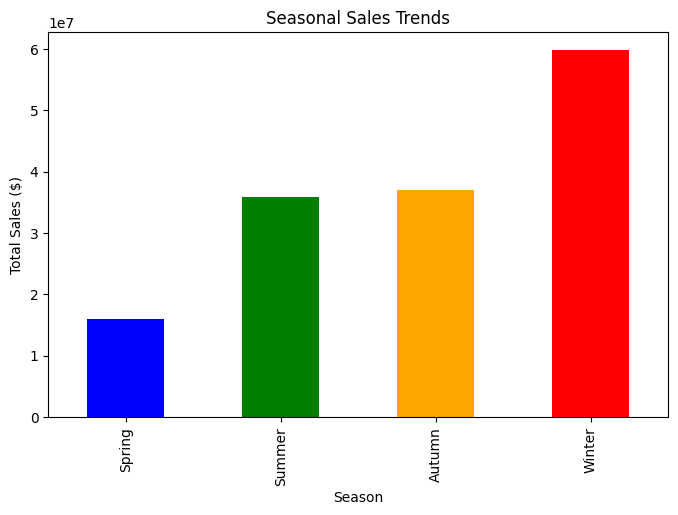

In [ ]:
df["Season"] = df["Date"].dt.month.map({12: "Winter", 1: "Winter", 2: "Winter", 
                                        3: "Spring", 4: "Spring", 5: "Spring",
                                        6: "Summer", 7: "Summer", 8: "Summer",
                                        9: "Autumn", 10: "Autumn", 11: "Autumn"})
seasonal_sales = df.groupby("Season")["Sale (Dollars)"].sum().sort_values()

plt.figure(figsize=(8, 5))
seasonal_sales.plot(kind="bar", color=["blue", "green", "orange", "red"])
plt.title("Seasonal Sales Trends")
plt.xlabel("Season")
plt.ylabel("Total Sales ($)")
plt.show()

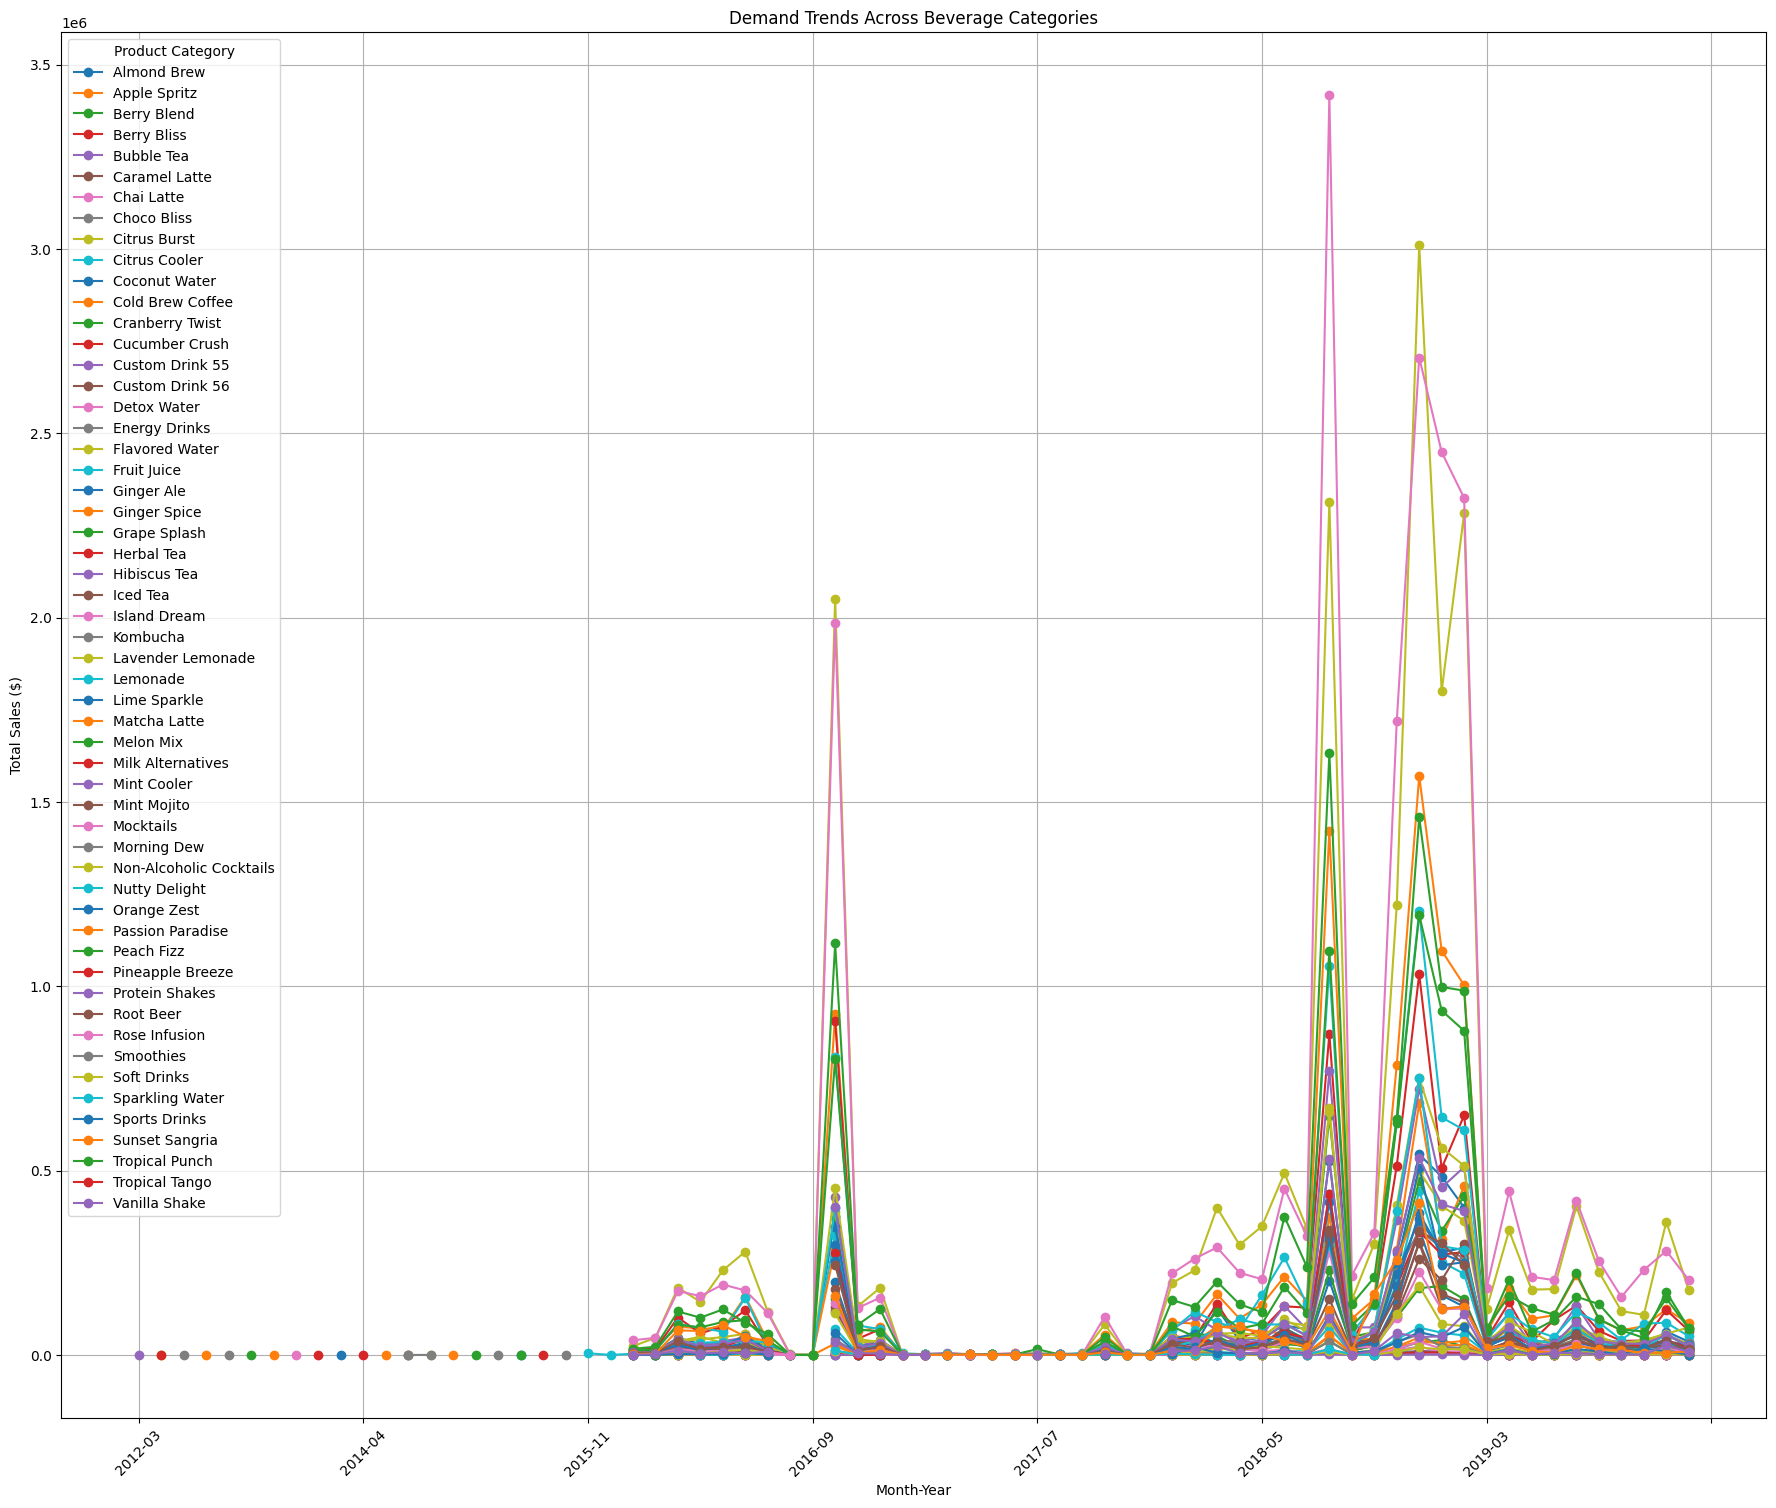

In [ ]:
category_trends = df.groupby(["Month-Year", "Category Name"])["Sale (Dollars)"].sum().unstack()

category_trends.plot(figsize=(22, 18), marker="o")
plt.title("Demand Trends Across Beverage Categories")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.grid()
plt.show()

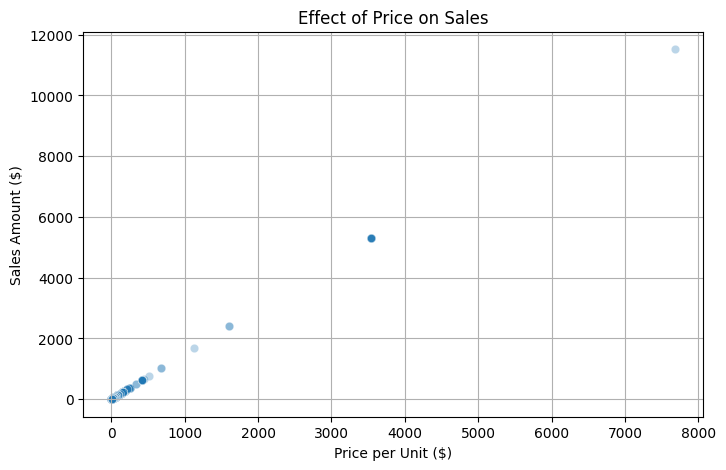

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["State Bottle Cost"], y=df["State Bottle Retail"], alpha=0.3)
plt.title("Effect of Price on Sales")
plt.xlabel("Price per Unit ($)")
plt.ylabel("Sales Amount ($)")
plt.grid()
plt.show()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_14072\1134903069.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Sales Forecast"] = df["Sale (Dollars)"].rolling(window=3).mean().fillna(method='bfill')


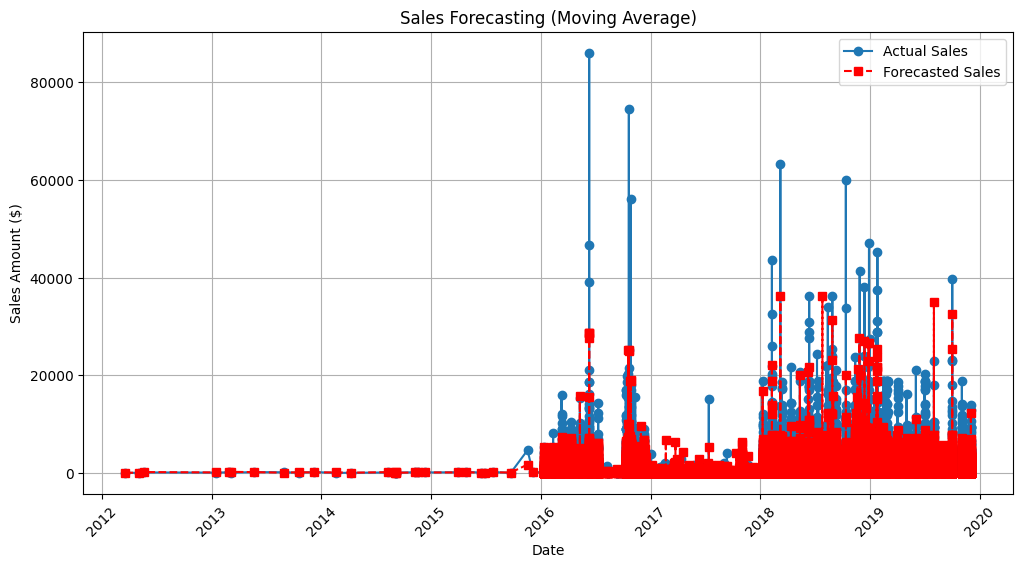

In [ ]:
df.columns = df.columns.str.strip().str.replace(r'\xa0', '', regex=True)

if "Sale (Dollars)" in df.columns:
    df["Sale (Dollars)"] = pd.to_numeric(df["Sale (Dollars)"], errors='coerce')
    df["Sales Forecast"] = df["Sale (Dollars)"].rolling(window=3).mean().fillna(method='bfill')
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df = df.sort_values("Date")

    plt.figure(figsize=(12, 6))
    plt.plot(df["Date"], df["Sale (Dollars)"], marker="o", label="Actual Sales")
    plt.plot(df["Date"], df["Sales Forecast"], marker="s", linestyle="dashed", color="red", label="Forecasted Sales")
    
    plt.title("Sales Forecasting (Moving Average)")
    plt.xlabel("Date")
    plt.ylabel("Sales Amount ($)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

else:
    print("❌ Column 'Sale (Dollars)' not found in the DataFrame!")


In [ ]:

df["Month-Year"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month-Year")["Sale (Dollars)"].sum().reset_index()

monthly_sales["Month-Year"] = monthly_sales["Month-Year"].astype(str)
monthly_sales["Month-Year"] = pd.to_datetime(monthly_sales["Month-Year"])




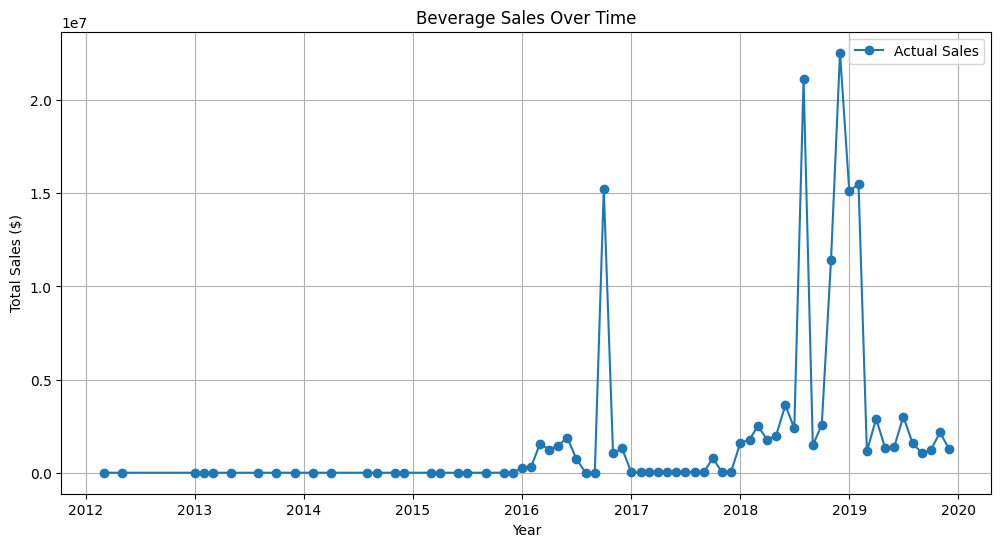

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["Month-Year"], monthly_sales["Sale (Dollars)"], marker="o", linestyle="-", label="Actual Sales")
plt.title("Beverage Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.legend()
plt.grid()
plt.show()


00:55:23 - cmdstanpy - INFO - Chain [1] start processing
00:55:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Sumit\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


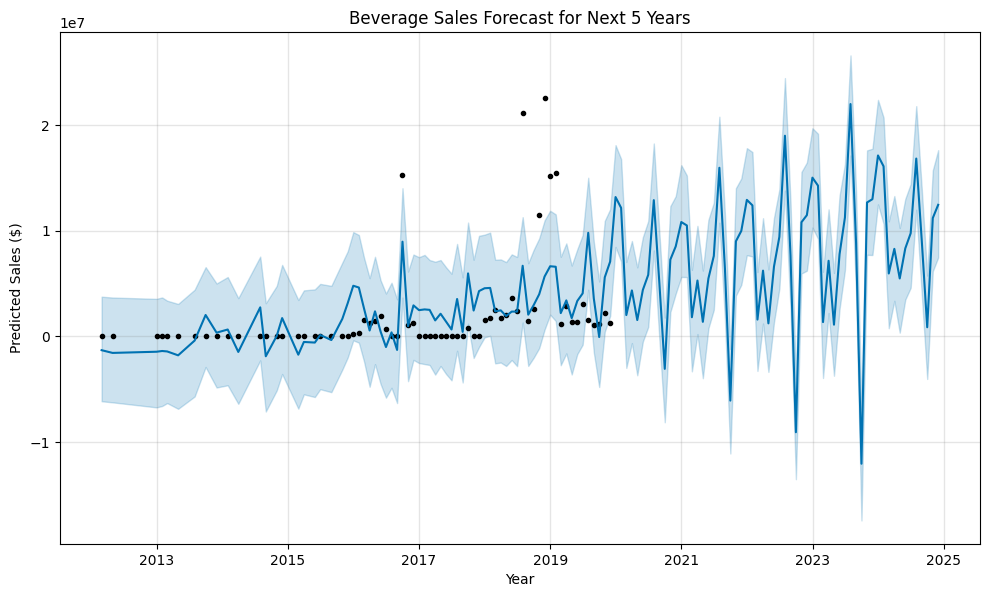

In [ ]:

from prophet import Prophet

prophet_df = monthly_sales.rename(columns={"Month-Year": "ds", "Sale (Dollars)": "y"})


model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=5 * 12, freq="M")


forecast = model.predict(future)


model.plot(forecast)
plt.title("Beverage Sales Forecast for Next 5 Years")
plt.xlabel("Year")
plt.ylabel("Predicted Sales ($)")
plt.show()
